# A2-bank.csv

### Read data

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the csv
df = pd.read_csv('A2-bank\\bank-additional-full.csv', sep=';', header=0, index_col=False)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [39]:
import pandas as pd

# Convertir columnas categóricas a variables dummy (one-hot encoding)
categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
df = pd.get_dummies(df, columns=categorical_columns)

# Convertir la variable objetivo a 0 y 1
df['y'] = df['y'].map({'no': 0, 'yes': 1})

# Convert true/false values to 0 and 1 for each column
for column in df.columns:
    if df[column].dtype == bool:
        df[column] = df[column].map({False: 0, True: 1})

# move y to the end
y = df.pop('y')
df['y'] = y

df.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0


### Preprocess

### Normalization

In [40]:
# Normalize all the columns but the y column from 0 to 1
for column in df:
    if column != 'y':
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())


df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0


### Output Train and Test

In [41]:
# Shuffle the data
df = df.sample(frac=1).reset_index(drop=True)

# Save the training and testing data
df.to_csv('A2-bank\\full.csv', sep=';', index=False)


### Plot the data

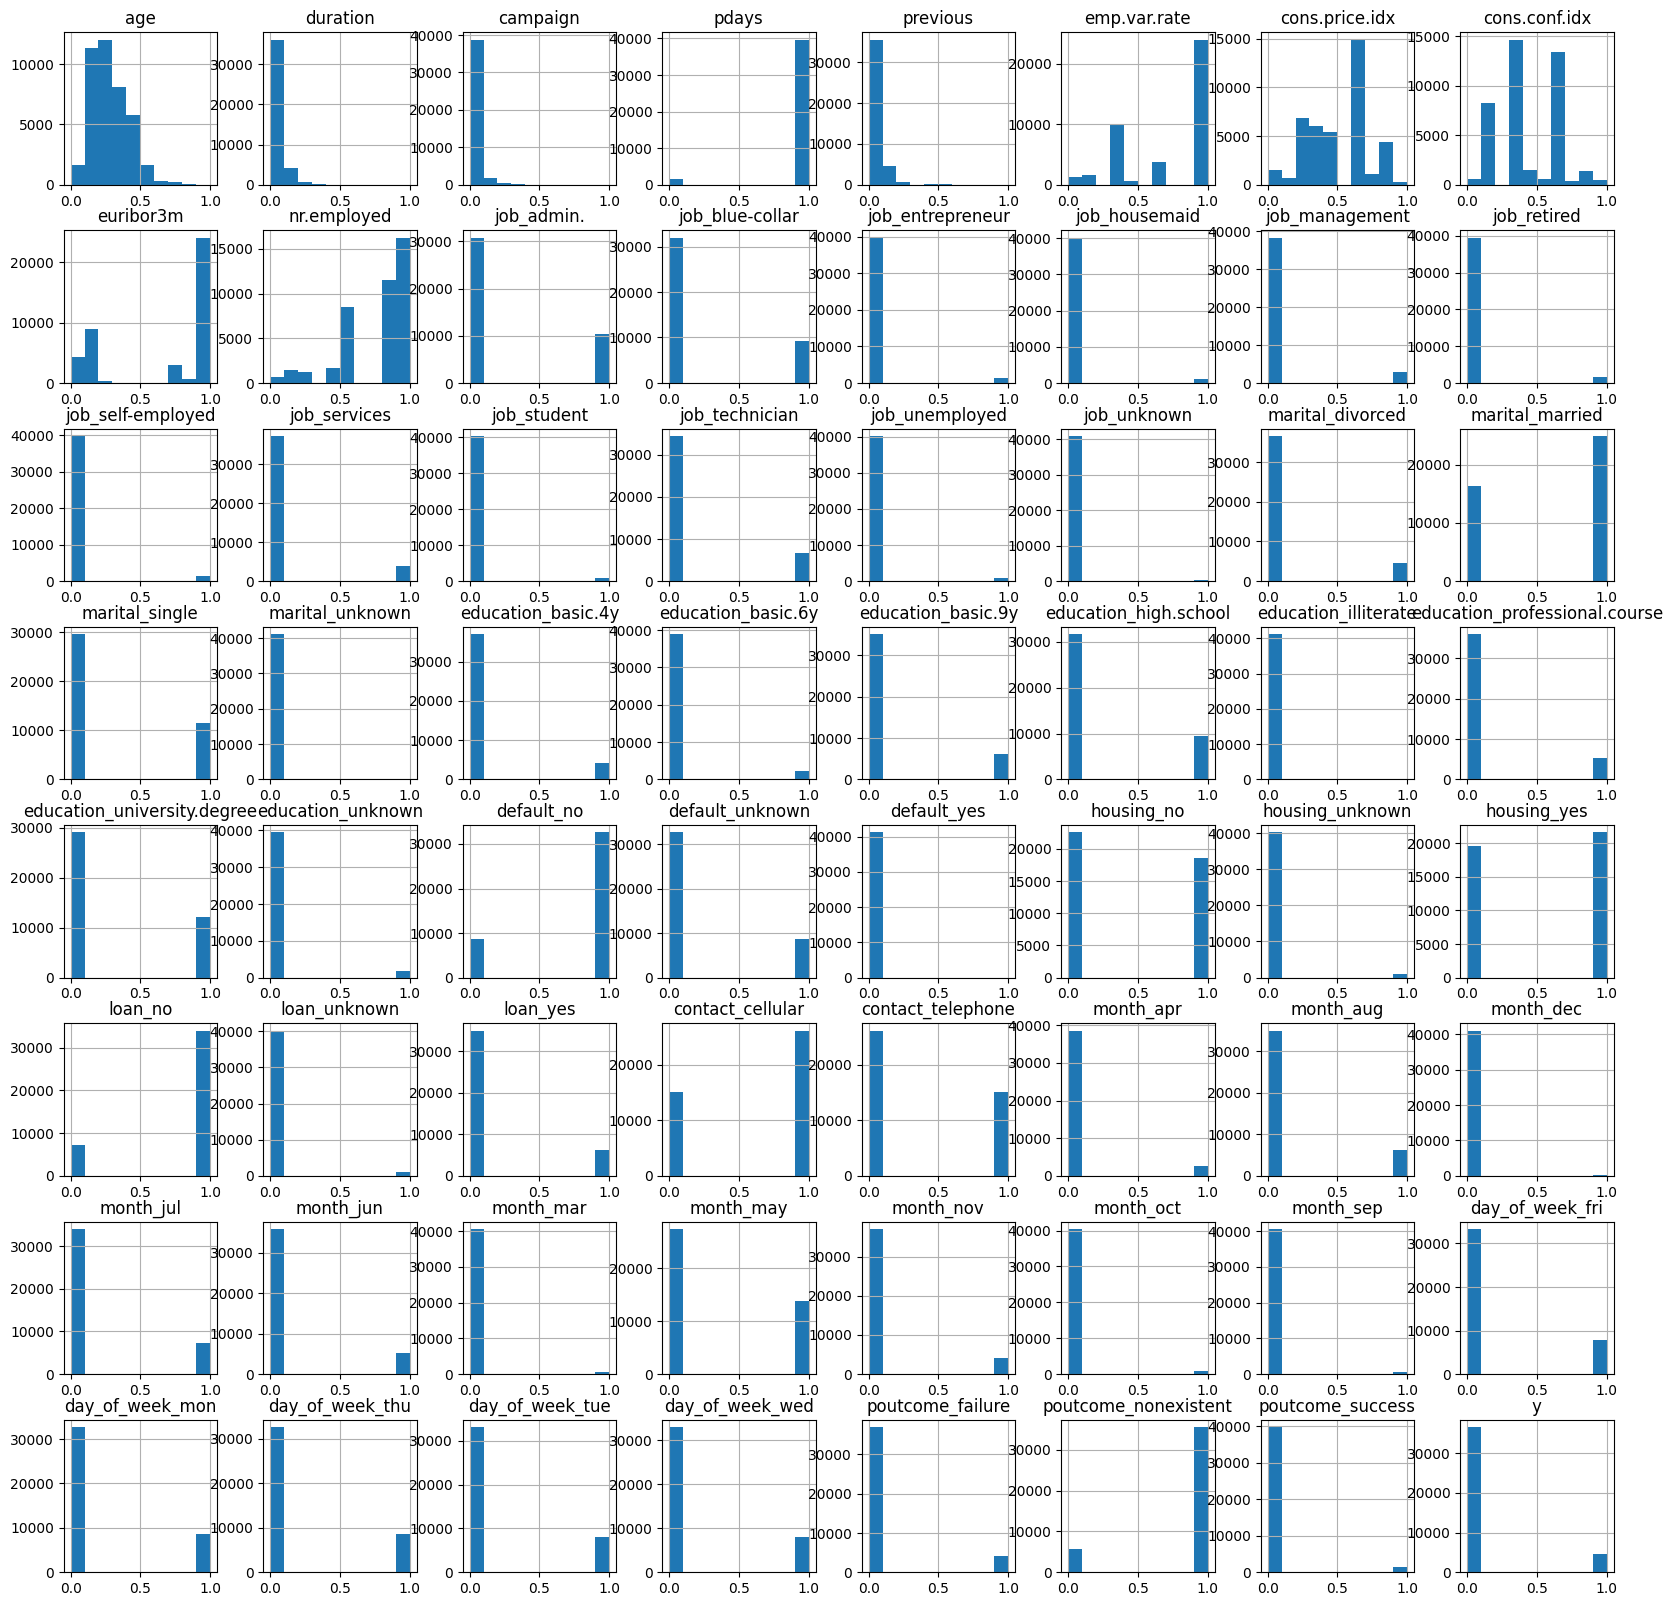

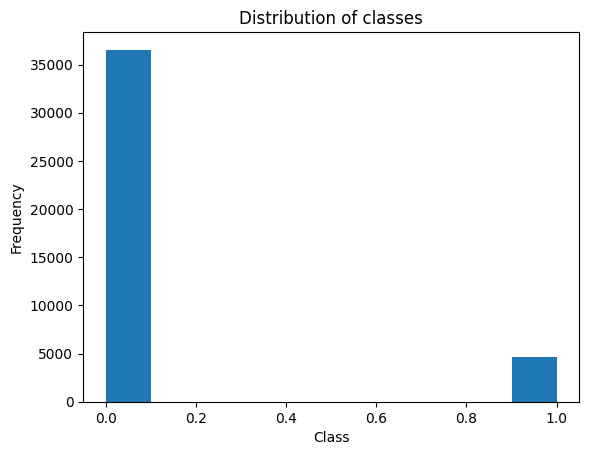

In [42]:
# Plot the distribution of all the columns
df.hist(df.columns, figsize=(20, 20))
plt.show()

# Plot the distribution of the classes
plt.hist(df['y'])
plt.title('Distribution of classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()
